<a href="https://colab.research.google.com/github/Md-Sanzid-Bin-Hossain/Smartphone-Video-based-KAM-KFM-3D-GRFs/blob/main/SOTA_Smartphone_based_KAM_KFM_3D_GRFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import numpy
import statistics
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statistics import stdev
import math
import h5py

import numpy as np
import time

from scipy.signal import butter,filtfilt
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
import pandas
import matplotlib.pyplot as plt

# from tsf.model import TransformerForecaster


# from tensorflow.keras.utils import np_utils
import itertools
###  Library for attention layers
import pandas as pd
import os
import numpy as np
#from tqdm import tqdm # Processing time measurement
from sklearn.model_selection import train_test_split

import statistics
import gc
import torch.nn.init as init

############################################################################################################################################################################
############################################################################################################################################################################

import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.utils.weight_norm as weight_norm


import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from torchsummary import summary
from torch.nn.parameter import Parameter


import torch.optim as optim


from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# File path


# Data loader

In [ ]:
def extract_vel_acc(V):

  velocity_all = []
  acceleration_all = []

  for i in range(44):
      velocity, acceleration = calculate_velocity_acceleration(V[:,i])

      velocity_all.append(velocity)
      acceleration_all.append(acceleration)

  return np.transpose(velocity_all), np.transpose(acceleration_all)

In [ ]:
def calculate_velocity_acceleration(position_data):
    n = len(position_data)

    # Calculate velocity
    velocity = []
    for i in range(n):
        if i == 0:
            vel = 0.0  # Set initial velocity as 0
        else:
            displacement = position_data[i] - position_data[i-1]
            time_interval = 0.01  # Assuming time intervals are uniform (e.g., 1 second)
            vel = displacement / time_interval
        velocity.append(vel)

    # Calculate acceleration
    acceleration = []
    for i in range(n):
        if i ==0:
            accel = 0.0  # Set acceleration as 0 for the first and last points
        else:
            velocity_change = velocity[i] - velocity[i-1]
            accel = velocity_change / time_interval
        acceleration.append(accel)

    return np.array(velocity), np.array(acceleration)

In [ ]:
if __name__ == '__main__':
    with h5py.File('/content/drive/My Drive/public dataset/all_17_subjects.h5', 'r') as hf:
        data_all_sub = {subject: subject_data[:] for subject, subject_data in hf.items()}
        data_fields = json.loads(hf.attrs['columns'])

In [ ]:
def data_extraction(A):
  for k in range(len(A)):
    zero_index_1=np.all(A[k:k+1,:,:] == 0, axis=0)
    zero_index = np.multiply(zero_index_1, 1)
    zero_index=np.array(zero_index)

    for i in range(len(zero_index)):
      if (sum(zero_index[i])==256):
        index=i
        break;

    # print(index)
### Taking only the stance phase of the gait
###################################################################################################################################################
    B=A[k:k+1,0:index,:]  ### Taking only the stance phase of the gait
    C_1=B.reshape((B.shape[0]*B.shape[1],B.shape[2]))
    if (k==0):
      C=C_1
    else:
      C=np.append(C,C_1,axis=0)

  index_24 = data_fields.index('body weight')
  index_25 = data_fields.index('body height')

  BW=(C[0:1, index_24]*9.8)
  BWH=(C[0:1, index_24]*9.8)*C[:, index_25]

  V=C[:,110:154]
  V=V.reshape(V.shape[0],11,4)

  V=(V-V[:,2:3,:])

  V=V.reshape(-1,44)

  velocity_all, acceleration_all = extract_vel_acc(V)

  V=V/C[0:1, index_25]


      ### IMUs- Chest, Waist, Right Foot, Right shank, Right thigh, Left Foot, Left shank, Left thigh, 2D-body coordinate
    ### 0:48- IMU, 48:92-2D body coordinate, 92:136 -2D velocity, 136:180 -2D acceleration, 180:185-- Target

  D=np.hstack((C[:,71:77],C[:,58:64],C[:,19:25],C[:,32:38],C[:,45:51],C[:,6:12],C[:,84:90],C[:,97:103],V,velocity_all, acceleration_all, C[:,3:5],-C[:, 154:155]/BW,
              -C[:, 156:157]/BW,-C[:, 155:156]/BW))



  return D

In [ ]:
data_subject_01 = data_all_sub['subject_01']
subject_1=data_extraction(data_subject_01)

print(subject_1.shape)

(84490, 185)


In [ ]:
data_subject_01 = data_all_sub['subject_01']
data_subject_02 = data_all_sub['subject_02']
data_subject_03 = data_all_sub['subject_03']
data_subject_04 = data_all_sub['subject_04']
data_subject_05 = data_all_sub['subject_05']
data_subject_06 = data_all_sub['subject_06']
data_subject_07 = data_all_sub['subject_07']
data_subject_08 = data_all_sub['subject_08']
data_subject_09 = data_all_sub['subject_09']
data_subject_10 = data_all_sub['subject_10']
data_subject_11 = data_all_sub['subject_11']
data_subject_12 = data_all_sub['subject_12']
data_subject_13 = data_all_sub['subject_13']
data_subject_14 = data_all_sub['subject_14']
data_subject_15 = data_all_sub['subject_15']
data_subject_16 = data_all_sub['subject_16']
data_subject_17 = data_all_sub['subject_17']


subject_1=data_extraction(data_subject_01)
subject_2=data_extraction(data_subject_02)
subject_3=data_extraction(data_subject_03)
subject_4=data_extraction(data_subject_04)
subject_5=data_extraction(data_subject_05)
subject_6=data_extraction(data_subject_06)
subject_7=data_extraction(data_subject_07)
subject_8=data_extraction(data_subject_08)
subject_9=data_extraction(data_subject_09)
subject_10=data_extraction(data_subject_10)
subject_11=data_extraction(data_subject_11)
subject_12=data_extraction(data_subject_12)
subject_13=data_extraction(data_subject_13)
subject_14=data_extraction(data_subject_14)
subject_15=data_extraction(data_subject_15)
subject_16=data_extraction(data_subject_16)
subject_17=data_extraction(data_subject_17)


In [ ]:
adjacency_matrix = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

adjacency_matrix=torch.from_numpy(adjacency_matrix.astype(np.float32))


def graph_based_augmentation(joints, adjacency_matrix, max_rotation, max_translation):
    num_joints = joints.shape[0]

    # Apply random rotations
    theta = torch.randn(num_joints, 1) * (max_rotation * np.pi / 180)  # Convert to radians
    cos_theta = torch.cos(theta)
    sin_theta = torch.sin(theta)

    rotated_joints = torch.zeros_like(joints)
    for i in range(num_joints):
        neighbors = torch.nonzero(adjacency_matrix[i]).squeeze(1)
        rotated_joints[i] = cos_theta[i] * joints[i] + torch.sum(sin_theta[i] * joints[neighbors], dim=0)

    # Apply random translations
    translation = torch.randn(2) * max_translation

    augmented_joints = rotated_joints + translation

    return augmented_joints


def augmentation_all(V):

    joints=V
    augmented_joints_all=[]

    for i in range(len(joints)):

      joint_1=joints[i,:,0:2].squeeze(0)
      augmented_joints_1 = graph_based_augmentation(joint_1, adjacency_matrix, max_rotation=2.0, max_translation=1.0)

      joint_2=joints[i,:,2:4].squeeze(0)
      augmented_joints_2 = graph_based_augmentation(joint_2, adjacency_matrix, max_rotation=2.0, max_translation=1.0)

      augmented_joints_1=augmented_joints_1.unsqueeze(0)
      augmented_joints_2=augmented_joints_2.unsqueeze(0)

      augmented_joints=torch.cat((augmented_joints_1,augmented_joints_2),dim=-1)
      augmented_joints_all.append(augmented_joints)

    augmented_joints_all = torch.stack(augmented_joints_all, dim=0)
    augmented_joints_all=augmented_joints_all.unsqueeze(1)

    return augmented_joints_all



In [ ]:
def data_extraction_aug(A):
  for k in range(len(A)):
    zero_index_1=np.all(A[k:k+1,:,:] == 0, axis=0)
    zero_index = np.multiply(zero_index_1, 1)
    zero_index=np.array(zero_index)

    for i in range(len(zero_index)):
      if (sum(zero_index[i])==256):
        index=i
        break;

    # print(index)
### Ta2Dg only the stance phase of the gait
###################################################################################################################################################
    B=A[k:k+1,0:index,:]  ### Ta2Dg only the stance phase of the gait
    C_1=B.reshape((B.shape[0]*B.shape[1],B.shape[2]))
    if (k==0):
      C=C_1
    else:
      C=np.append(C,C_1,axis=0)

  index_24 = data_fields.index('body weight')
  index_25 = data_fields.index('body height')

  BW=(C[0:1, index_24]*9.8)
  BWH=(C[0:1, index_24]*9.8)*C[:, index_25]

  V=C[:,110:154]
  V=V.reshape(V.shape[0],11,4)

  V=(V-V[:,2:3,:])

  V=augmentation_all(torch.from_numpy(V))
  V=V.reshape(-1,44)
  velocity_all, acceleration_all = extract_vel_acc(V)

  V=V/C[0:1, index_25]


      ### IMUs- Chest, Waist, Right Foot, Right shank, Right thigh, Left Foot, Left shank, Left thigh, 2D-body coordinate
    ### 0:48- IMU, 48:92-2D body coordinate, 92:136 -2D velocity, 136:180 -2D acceleration, 180:185-- Target

  D=np.hstack((C[:,71:77],C[:,58:64],C[:,19:25],C[:,32:38],C[:,45:51],C[:,6:12],C[:,84:90],C[:,97:103],V,velocity_all, acceleration_all, C[:,3:5],-C[:, 154:155]/BW,
              -C[:, 156:157]/BW,-C[:, 155:156]/BW))

  return D


In [ ]:
# data_subject_01 = data_all_sub['subject_01']
# subject_1_aug=data_extraction_aug(data_subject_01)

# print(subject_1.shape)

In [ ]:
subject_1.shape

(84490, 185)

# Data processing

In [ ]:
main_dir = "/content/drive/My Drive/public dataset/Public_dataset_2/Subject01"
os.mkdir(main_dir)
path="/content/"
subject='Subject_01'

In [ ]:
train_dataset=np.concatenate((subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,subject_10,subject_11,
                              subject_12,subject_14,subject_15,subject_16,subject_17),axis=0)

test_dataset=subject_13

encoder='LSTM'

In [ ]:
# Train features #
from sklearn.preprocessing import StandardScaler



x_train=train_dataset[:,0:180]


scale= StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
train_X_1_1=x_train

# # Test features #


x_test=test_dataset[:,0:180]

test_X_1_1=x_test

m1=180
m2=185


  ### Label ###

train_y_1_1=train_dataset[:,m1:m2]
test_y_1_1=test_dataset[:,m1:m2]

train_dataset_1=np.concatenate((train_X_1_1,train_y_1_1),axis=1)
test_dataset_1=np.concatenate((test_X_1_1,test_y_1_1),axis=1)

train_dataset_1=pd.DataFrame(train_dataset_1)
test_dataset_1=pd.DataFrame(test_dataset_1)

train_dataset_1.dropna(axis=0,inplace=True)
test_dataset_1.dropna(axis=0,inplace=True)

train_dataset_1=np.array(train_dataset_1)
test_dataset_1=np.array(test_dataset_1)

train_dataset_sum = np. sum(train_dataset_1)
array_has_nan = np. isinf(train_dataset_1[:,48:180])

print(array_has_nan)

print(train_dataset_1.shape)



train_X_1=train_dataset_1[:,0:m1]
test_X_1=test_dataset_1[:,0:m1]

train_y_1=train_dataset_1[:,m1:m2]
test_y_1=test_dataset_1[:,m1:m2]



L1=len(train_X_1)
L2=len(test_X_1)


w=50



a1=L1//w
b1=L1%w

a2=L2//w
b2=L2%w

# a3=L3//w
# b3=L3%w

     #### Features ####
train_X_2=train_X_1[L1-w+b1:L1,:]
test_X_2=test_X_1[L2-w+b2:L2,:]
# validation_X_2=validation_X_1[L3-w+b3:L3,:]


    #### Output ####

train_y_2=train_y_1[L1-w+b1:L1,:]
test_y_2=test_y_1[L2-w+b2:L2,:]
# validation_y_2=validation_y_1[L3-w+b3:L3,:]



     #### Features ####

train_X=np.concatenate((train_X_1,train_X_2),axis=0)
test_X=np.concatenate((test_X_1,test_X_2),axis=0)
# validation_X=np.concatenate((validation_X_1,validation_X_2),axis=0)


    #### Output ####

train_y=np.concatenate((train_y_1,train_y_2),axis=0)
test_y=np.concatenate((test_y_1,test_y_2),axis=0)
# validation_y=np.concatenate((validation_y_1,validation_y_2),axis=0)


print(train_y.shape)
    #### Reshaping ####
train_X_3_p= train_X.reshape((a1+1,w,train_X.shape[1]))
test_X = test_X.reshape((a2+1,w,test_X.shape[1]))


train_y_3_p= train_y.reshape((a1+1,w,5))
test_y= test_y.reshape((a2+1,w,5))



# train_X_1D=train_X_3
test_X_1D=test_X

train_X_3=train_X_3_p
train_y_3=train_y_3_p
# print(train_X_4.shape,train_y_3.shape)


train_X_1D, X_validation_1D, train_y_5, Y_validation = train_test_split(train_X_3,train_y_3, test_size=0.20, random_state=True)
#train_X_1D, X_validation_1D_ridge, train_y, Y_validation_ridge = train_test_split(train_X_1D_m,train_y_m, test_size=0.10, random_state=True)   [0:2668,:,:]

print(train_X_1D.shape,train_y_5.shape,X_validation_1D.shape,Y_validation.shape)


s=test_X_1D.shape[0]*w

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(1241165, 185)
(1241200, 5)
(19859, 50, 180) (19859, 50, 5) (4965, 50, 180) (4965, 50, 5)


0

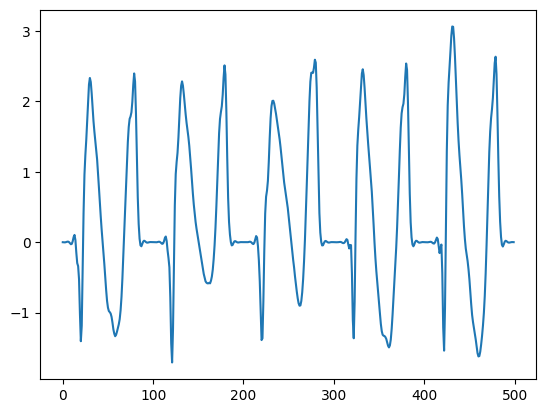

In [ ]:
plt.plot(test_y[0:10,:,0].reshape(500,1))

In [ ]:
# from numpy import savetxt
# savetxt('train_data_check.csv', train_dataset_1[:,48:92], delimiter=',')

In [ ]:
### IMUs- Chest, Waist, Right Foot, Right shank, Right thigh, Left Foot, Left shank, Left thigh, 2D-body coordinate
### 0:48- IMU, 48:92-2D body coordinate, 92:97-- Target


### Data Processing

batch_size = 64

val_targets = torch.Tensor(Y_validation)
test_features = torch.Tensor(test_X_1D)
test_targets = torch.Tensor(test_y)


## all Modality Features

train_features = torch.Tensor(train_X_1D)
train_targets = torch.Tensor(train_y_5)
val_features = torch.Tensor(X_validation_1D)


train_features_acc_8=torch.cat((train_features[:,:,0:3],train_features[:,:,6:9],train_features[:,:,12:15],train_features[:,:,18:21],train_features[:,:,24:27]\
                             ,train_features[:,:,30:33],train_features[:,:,36:39],train_features[:,:,42:45]),axis=-1)
test_features_acc_8=torch.cat((test_features[:,:,0:3],test_features[:,:,6:9],test_features[:,:,12:15],test_features[:,:,18:21],test_features[:,:,24:27]\
                             ,test_features[:,:,30:33],test_features[:,:,36:39],test_features[:,:,42:45]),axis=-1)
val_features_acc_8=torch.cat((val_features[:,:,0:3],val_features[:,:,6:9],val_features[:,:,12:15],val_features[:,:,18:21],val_features[:,:,24:27]\
                             ,val_features[:,:,30:33],val_features[:,:,36:39],val_features[:,:,42:45]),axis=-1)


train_features_gyr_8=torch.cat((train_features[:,:,3:6],train_features[:,:,9:12],train_features[:,:,15:18],train_features[:,:,21:24],train_features[:,:,27:30]\
                             ,train_features[:,:,33:36],train_features[:,:,39:42],train_features[:,:,45:48]),axis=-1)
test_features_gyr_8=torch.cat((test_features[:,:,3:6],test_features[:,:,9:12],test_features[:,:,15:18],test_features[:,:,21:24],test_features[:,:,27:30]\
                             ,test_features[:,:,33:36],test_features[:,:,39:42],test_features[:,:,45:48]),axis=-1)
val_features_gyr_8=torch.cat((val_features[:,:,3:6],val_features[:,:,9:12],val_features[:,:,15:18],val_features[:,:,21:24],val_features[:,:,27:30]\
                             ,val_features[:,:,33:36],val_features[:,:,39:42],val_features[:,:,45:48]),axis=-1)


train_features_2D_point=train_features[:,:,48:92]
test_features_2D_point=test_features[:,:,48:92]
val_features_2D_point=val_features[:,:,48:92]

print(train_features_2D_point.shape)

sequence = [0, 2, 1, 3]

train_features_2D_point_2D_1=train_features_2D_point.view(train_features_2D_point.shape[0],train_features_2D_point.shape[1],11,4)[:,:,:,sequence]
test_features_2D_point_2D_1=test_features_2D_point.view(test_features_2D_point.shape[0],test_features_2D_point.shape[1],11,4)[:,:,:,sequence]
val_features_2D_point_2D_1=val_features_2D_point.view(val_features_2D_point.shape[0],val_features_2D_point.shape[1],11,4)[:,:,:,sequence]


train_features_2D_point_2D=train_features_2D_point_2D_1.reshape(train_features_2D_point.shape[0],train_features_2D_point.shape[1],22,2)
test_features_2D_point_2D=test_features_2D_point_2D_1.reshape(test_features_2D_point.shape[0],test_features_2D_point.shape[1],22,2)
val_features_2D_point_2D=val_features_2D_point_2D_1.reshape(val_features_2D_point.shape[0],val_features_2D_point.shape[1],22,2)



print(train_features_2D_point_2D.shape)


train_features_2D_velocity=train_features[:,:,92:136]
test_features_2D_velocity=test_features[:,:,92:136]
val_features_2D_velocity=val_features[:,:,92:136]


train_features_2D_acceleration=train_features[:,:,136:180]
test_features_2D_acceleration=test_features[:,:,136:180]
val_features_2D_acceleration=val_features[:,:,136:180]


train = TensorDataset(train_features, train_features_acc_8,train_features_gyr_8, train_features_2D_point,train_features_2D_point_2D,train_features_2D_velocity,train_features_2D_acceleration, train_targets)
val = TensorDataset(val_features, val_features_acc_8, val_features_gyr_8, val_features_2D_point,val_features_2D_point_2D, val_features_2D_velocity, val_features_2D_acceleration, val_targets)
test = TensorDataset(test_features, test_features_acc_8, test_features_gyr_8, test_features_2D_point, test_features_2D_point_2D, test_features_2D_velocity,test_features_2D_acceleration, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=False)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=False)


torch.Size([19859, 50, 44])
torch.Size([19859, 50, 22, 2])


# Important Functions

In [ ]:
def RMSE_prediction(yhat_4,test_y,s):

  s1=yhat_4.shape[0]*yhat_4.shape[1]

  test_o=test_y.reshape((s1,5))
  yhat=yhat_4.reshape((s1,5))


  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]


  y_1=y_1_no
  y_2=y_2_no
  y_3=y_3_no
  y_4=y_4_no
  y_5=y_5_no



  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]



  Z_1=y_1
  Z_2=y_2
  Z_3=y_3
  Z_4=y_4
  Z_5=y_5


  ###calculate RMSE

  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100

  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)



  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]


  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)


              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])


      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)



  return rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


def PCC_prediction(yhat_4,test_y,s):

  s1=yhat_4.shape[0]*yhat_4.shape[1]

  test_o=test_y.reshape((s1,5))
  yhat=yhat_4.reshape((s1,5))


  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]


  y_1=y_1_no
  y_2=y_2_no
  y_3=y_3_no
  y_4=y_4_no
  y_5=y_5_no



  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]



  Y_1=y_1
  Y_2=y_2
  Y_3=y_3
  Y_4=y_4
  Y_5=y_5


  ###calculate RMSE

  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100

  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)


  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]

  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)

              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])


      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)


  return rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


# def estimate_coef(x, y):
#     # number of observations/points
#     n = np.size(x)

#     # mean of x and y vector
#     m_x = np.mean(x)
#     m_y = np.mean(y)

#     # calculating cross-deviation and deviation about x
#     SS_xy = np.sum(y*x) - n*m_y*m_x
#     SS_xx = np.sum(x*x) - n*m_x*m_x

#     # calculating regression coefficients
#     b_1 = SS_xy / SS_xx
#     b_0 = m_y - b_1*m_x

#     return (b_0, b_1)

def estimate_coef(x, y):
    # Convert input data to PyTorch tensors
    x_tensor = torch.tensor(x, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    # Calculate the number of observations/points
    n = x_tensor.size(0)

    # Calculate the mean of x and y tensors
    m_x = torch.mean(x_tensor)
    m_y = torch.mean(y_tensor)

    # Calculate cross-deviation and deviation about x
    SS_xy = torch.sum(y_tensor * x_tensor) - n * m_y * m_x
    SS_xx = torch.sum(x_tensor * x_tensor) - n * m_x * m_x

    # Calculate regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return (b_0.item(), b_1.item())

############################################################################################################################################################################################################################################################################################################################################################################################################################################################################

### Test dataset has to be without shuffle for this function to work properly


def DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5):

  a_1,b_1=estimate_coef(Y_1,Z_1)
  a_2,b_2=estimate_coef(Y_2,Z_2)
  a_3,b_3=estimate_coef(Y_3,Z_3)
  a_4,b_4=estimate_coef(Y_4,Z_4)
  a_5,b_5=estimate_coef(Y_5,Z_5)

  # print(a_1,b_1)
  # print(a_2,b_2)
  # print(a_3,b_3)
  # print(a_4,b_4)
  # print(a_5,b_5)


  #### All 16 angles prediction  ####


  s1=yhat_4.shape[0]*yhat_4.shape[1]

  test_o=test_y.reshape((s1,5))
  yhat=yhat_4.reshape((s1,5))


  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]


  y_1=y_1_no
  y_2=y_2_no
  y_3=y_3_no
  y_4=y_4_no
  y_5=y_5_no


  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]


  y_1=y_1*b_1+a_1
  y_2=y_2*b_2+a_2
  y_3=y_3*b_3+a_3
  y_4=y_4*b_4+a_4
  y_5=y_5*b_5+a_5


  ###calculate RMSE

  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100



  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)



  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]


  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)


              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])



      #### Mean and standard deviation ####

  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

  return rmse, p




############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:

class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()

    def forward(self, pred, target):
        mse = nn.MSELoss()(pred, target)
        rmse = torch.sqrt(mse)
        return rmse


# Training Function

In [ ]:
def train_2D_early(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    criterion =RMSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output= model(data_2D.to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target in val_loader:
                output= model(data_2D.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")
        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break


    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    return model

In [ ]:
def train_2D_early_2D(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    criterion =RMSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output= model(data_2D_2D.to(device).float())

            loss = criterion(output, target.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target in val_loader:
                output= model(data_2D_2D.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")
        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break


    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    return model

In [ ]:
def train_mm_target_sota(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()

    criterion_2 =RMSELoss()

    optimizer = torch.optim.Adam(model.parameters())


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):
            optimizer.zero_grad()
            target_output= model(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())

            loss_1 = criterion_2(target_output, target.to(device).float())

            loss = loss_1

            loss.backward()
            optimizer.step()

            running_loss += loss_1.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target in val_loader:
                output= model(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
                val_loss += criterion_2(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        torch.set_printoptions(precision=4)

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    # # Save the trained model
    # torch.save(model.state_dict(), "model.pth")

    return model

# SOTA_Models

## 1. FFN

In [ ]:
class FFN(nn.Module):
    def __init__(self, input_1D):
        super(FFN, self).__init__()

        self.BN= nn.BatchNorm1d(input_1D, affine=False)

        self.fc1 = nn.Linear(input_1D, 512)
        self.dropout1 = nn.Dropout(0.05)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.05)
        self.fc3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.05)

        self.flatten=nn.Flatten()

        self.fc_f=nn.Linear(128*50, 5*50)


    def forward(self, inputs_1D_N):

        inputs_1D_N_1=inputs_1D_N.view(inputs_1D_N.size(0)*inputs_1D_N.size(1),inputs_1D_N.size(-1))
        inputs_1D_N_1=self.BN(inputs_1D_N_1)
        inputs_1D_N=inputs_1D_N_1.view(-1, 50, inputs_1D_N_1.size(-1))

        x = F.relu(self.fc1(inputs_1D_N))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)

        x=self.flatten(x)

        x = self.fc_f(x).view(-1,50,5)

        return x


In [ ]:
lr = 0.001
model = FFN(44)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print("Number of parameters:", num_params)

mm_early_ffn = train_2D_early(train_loader, lr,40,model,path + encoder + '_ffn_video.pth')

In [ ]:
mm_early_ffn= FFN(44)
mm_early_ffn.load_state_dict(torch.load(path+encoder+'_ffn_video.pth'))
mm_early_ffn.to(device)

mm_early_ffn.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output= mm_early_ffn(data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()



yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_1=np.hstack([rmse,p])

## 2. Bi-LSTM

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 512, bidirectional=False, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(512, 256, bidirectional=False, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.dropout=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout(out_2)
        out_2=self.flatten(out_2)


        return out_2

In [ ]:
class MM_early(nn.Module):

    def __init__(self, input, drop_prob=0.35):
        super(MM_early, self).__init__()
        self.encoder_input=Encoder(input,drop_prob)
        self.fc=nn.Linear(256*50, 5*50)
        self.BN= nn.BatchNorm1d(input, affine=False)

    def forward(self, input_x):

        input_x_1=input_x.view(input_x.size(0)*input_x.size(1),input_x.size(-1))
        input_x_1=self.BN(input_x_1)
        input_x_2=input_x_1.view(-1, 50, input_x_1.size(-1))
        out=self.encoder_input(input_x_2)

        out = self.fc(out).view(-1,50,5)

        return out

In [ ]:
lr = 0.001
model = MM_early(44)

mm_early = train_2D_early(train_loader, lr,40,model,path + encoder + '_lstm_video.pth')

In [ ]:
mm_early= MM_early(44)
mm_early.load_state_dict(torch.load(path+encoder+'_lstm_video.pth'))
mm_early.to(device)

mm_early.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output= mm_early(data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()



yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_2=np.hstack([rmse,p])

## 3. Conv_2D

In [ ]:
class Encoder_CNN_2D(nn.Module):
    def __init__(self, input_size, dropout, hidden_dim=256, output_size=512, kernel_size=(3,5), stride=(1,1), padding=(1,2)):
        super(Encoder_CNN_2D, self).__init__()
        self.conv1 = nn.Conv2d(input_size, hidden_dim, kernel_size, stride, padding)
        self.conv2 = nn.Conv2d(hidden_dim, hidden_dim, kernel_size, stride, padding)
        self.conv3 = nn.Conv2d(hidden_dim, output_size, kernel_size, stride, padding)
        self.conv4 = nn.Conv2d(output_size, output_size, kernel_size, stride, padding)
        self.BN_1= nn.BatchNorm2d(hidden_dim)
        self.BN_2= nn.BatchNorm2d(hidden_dim)
        self.BN_3= nn.BatchNorm2d(output_size)
        self.BN_4= nn.BatchNorm2d(output_size)
        self.pool_1 = nn.MaxPool2d(kernel_size=(2,2))
        self.pool_2 = nn.MaxPool2d(kernel_size=(1,2))

        # Fully connected layers
        self.fc1 = nn.Linear(512, 64)
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(dropout)
        self.flatten=nn.Flatten()

    def forward(self, x):

        x = x.transpose(1, 3)  # reshape from (batch_size, seq_len, input_size) to (batch_size, input_size, seq_len)
        x = F.relu(self.conv1(x))
        x = self.BN_1(x)
        x = self.pool_1(x)
        x = F.relu(self.conv2(x))
        x = self.BN_2(x)
        x = self.pool_1(x)
        x = F.relu(self.conv3(x))
        x = self.BN_3(x)
        x = self.pool_2(x)
        x = F.relu(self.conv4(x))
        x = self.BN_4(x)
        x = self.pool_2(x)

        # print(x.shape)

        x = x.transpose(1, 3)  # reshape back to (batch_size, seq_len, output_size)

        # print(x.shape)


        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        # print(x.shape)
        # x = self.flatten(x)


        return x

In [ ]:
class conv2d_model(nn.Module):
    def __init__(self, input_2D):
        super(conv2d_model, self).__init__()

        self.BN_2= nn.BatchNorm2d(input_2D, affine=False)
        self.conv2d = Encoder_CNN_2D(input_2D,0.05)
        self.flatten=nn.Flatten()
        self.fc_f=nn.Linear(480, 5*50)

    def forward(self, inputs_2D_N):

        inputs_2D_N_1=inputs_2D_N.transpose(1,3)
        inputs_2D_N_2=self.BN_2(inputs_2D_N_1)
        inputs_2D_N_3=inputs_2D_N_2.transpose(1,3)

        x=self.conv2d(inputs_2D_N_3)
        x=self.flatten(x)

        x = self.fc_f(x).view(-1,50,5)

        return x


In [ ]:
lr = 0.001
model = conv2d_model(2)

mm_early = train_2D_early_2D(train_loader, lr,40,model,path + encoder + '_conv2d_video.pth')

In [ ]:
mm_early= conv2d_model(2)
mm_early.load_state_dict(torch.load(path+encoder+'_conv2d_video.pth'))
mm_early.to(device)

mm_early.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output= mm_early(data_2D_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()



yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_3=np.hstack([rmse,p])

## 4. Kinetics-FM-DLR-Net

### Training Function

In [ ]:
class PearsonCorrLoss(nn.Module):

  def __init__(self):
    super(PearsonCorrLoss, self).__init__()

  def forward(self, y_true, y_pred):

    # Calculate mean values
    mx = torch.mean(y_true)
    my = torch.mean(y_pred)

    # Calculate differences from mean
    xm, ym = y_true - mx, y_pred - my

    # Calculate numerator and denominator of Pearson correlation coefficient
    r_num = torch.sum(torch.mul(xm, ym))
    r_den = torch.sqrt(torch.mul(torch.sum(torch.square(xm)), torch.sum(torch.square(ym))))

    # Calculate Pearson correlation coefficient
    r = r_num / r_den

    # Clamp r between 0 and 1
    r = torch.clamp(r, 0, 1.0)

    # Calculate l2 loss
    l2 = 1 - torch.square(r)



    return l2

In [ ]:
def train_sota(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()

    # Defining loss function and optimizer
    criterion =RMSELoss()
    # criterion =correlation_coefficient_loss_joint_pytorch()

    # criterion=PearsonCorrLoss()
    optimizer= torch.optim.Adam(model.parameters(), lr=learn_rate)


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):

            optimizer.zero_grad()
            output_1, output_2, output_3, output= model(data_2D.to(device).float(),data_2D_2D.to(device).float())

                    # Compute the regularization loss for the custom linear layers
            regularization_loss = 0.0
            if hasattr(model.output_GRU, 'regularizer_loss'):
                regularization_loss += model.output_GRU.regularizer_loss()
            if hasattr(model.output_C1, 'regularizer_loss'):
                regularization_loss += model.output_C1.regularizer_loss()
            if hasattr(model.output_C2, 'regularizer_loss'):
                regularization_loss += model.output_C2.regularizer_loss()

            # output= model(data_1D.to(device).float(),data_2D.to(device).float())

            loss=criterion(output_1, target.to(device).float())+criterion(output_2, target.to(device).float())+criterion(output_3, target.to(device).float())\
            +criterion(output, target.to(device).float())+regularization_loss
            loss_1=criterion(output, target.to(device).float())

            loss.backward()
            optimizer.step()

            running_loss += loss_1.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target in val_loader:
                output_1, output_2, output_3, output= model(data_2D.to(device).float(),data_2D_2D.to(device).float())
                # output= model(data_1D.to(device).float(),data_2D.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break

    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")

    return model

In [ ]:
def train_sota_pcc(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()

    # Defining loss function and optimizer
    # criterion =RMSELoss()
    # criterion =correlation_coefficient_loss_joint_pytorch()

    criterion=PearsonCorrLoss()
    optimizer= torch.optim.Adam(model.parameters(), lr=learn_rate)


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):

            optimizer.zero_grad()

            output_1, output_2, output_3, output= model(data_2D.to(device).float(),data_2D_2D.to(device).float())

                    # Compute the regularization loss for the custom linear layers
            regularization_loss = 0.0
            if hasattr(model.output_GRU, 'regularizer_loss'):
                regularization_loss += model.output_GRU.regularizer_loss()
            if hasattr(model.output_C1, 'regularizer_loss'):
                regularization_loss += model.output_C1.regularizer_loss()
            if hasattr(model.output_C2, 'regularizer_loss'):
                regularization_loss += model.output_C2.regularizer_loss()

            # output= model(data_1D.to(device).float(),data_2D.to(device).float())

            loss=criterion(output_1, target.to(device).float())+criterion(output_2, target.to(device).float())+criterion(output_3, target.to(device).float())\
            +criterion(output, target.to(device).float())+regularization_loss
            loss_1=criterion(output, target.to(device).float())


            loss.backward()
            optimizer.step()

            running_loss += loss_1.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target in val_loader:

                output_1, output_2, output_3, output= model(data_2D.to(device).float(),data_2D_2D.to(device).float())
                # output= model(data_1D.to(device).float(),data_2D.to(device).float())
                val_loss += criterion(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break

    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")

    return model

### Model

In [ ]:
class Encoder_GRU(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder_GRU, self).__init__()
        self.lstm_1 = nn.GRU(input_dim, 512, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.GRU(1024, 256, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout_2(out_2)
        out_2=self.flatten(out_2)


        return out_2


In [ ]:
class Encoder_CNN_1D(nn.Module):
    def __init__(self, input_size, dropout, hidden_dim=256, output_size=512, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.conv1 = nn.Conv1d(input_size, hidden_dim, kernel_size, stride, padding)
        self.conv2 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size, stride, padding)
        self.conv3 = nn.Conv1d(hidden_dim, output_size, kernel_size, stride, padding)
        self.conv4 = nn.Conv1d(output_size, output_size, kernel_size, stride, padding)
        self.BN_1= nn.BatchNorm1d(hidden_dim)
        self.BN_2= nn.BatchNorm1d(hidden_dim)
        self.BN_3= nn.BatchNorm1d(output_size)
        self.BN_4= nn.BatchNorm1d(output_size)
        self.pool = nn.MaxPool1d(kernel_size=2)

        # Fully connected layers
        self.fc1 = nn.Linear(512, 64)
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(dropout)
        self.flatten=nn.Flatten()

    def forward(self, x):
        x = x.transpose(1, 2)  # reshape from (batch_size, seq_len, input_size) to (batch_size, input_size, seq_len)
        x = F.relu(self.conv1(x))
        x = self.BN_1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.BN_2(x)
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.BN_3(x)
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.BN_4(x)
        x = self.pool(x)

        x = x.transpose(1, 2)  # reshape back to (batch_size, seq_len, output_size)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.flatten(x)

        return x

In [ ]:
class Encoder_CNN_2D(nn.Module):
    def __init__(self, input_size, dropout, hidden_dim=256, output_size=512, kernel_size=(3,5), stride=(1,1), padding=(1,2)):
        super().__init__()
        self.conv1 = nn.Conv2d(input_size, hidden_dim, kernel_size, stride, padding)
        self.conv2 = nn.Conv2d(hidden_dim, hidden_dim, kernel_size, stride, padding)
        self.conv3 = nn.Conv2d(hidden_dim, output_size, kernel_size, stride, padding)
        self.conv4 = nn.Conv2d(output_size, output_size, kernel_size, stride, padding)
        self.BN_1= nn.BatchNorm2d(hidden_dim)
        self.BN_2= nn.BatchNorm2d(hidden_dim)
        self.BN_3= nn.BatchNorm2d(output_size)
        self.BN_4= nn.BatchNorm2d(output_size)
        self.pool_1 = nn.MaxPool2d(kernel_size=(2,2))
        self.pool_2 = nn.MaxPool2d(kernel_size=(1,2))

        # Fully connected layers
        self.fc1 = nn.Linear(512, 64)
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(dropout)
        self.flatten=nn.Flatten()

    def forward(self, x):
        x = x.transpose(1, 3)  # reshape from (batch_size, seq_len, input_size) to (batch_size, input_size, seq_len)
        x = F.relu(self.conv1(x))
        x = self.BN_1(x)
        x = self.pool_1(x)
        x = F.relu(self.conv2(x))
        x = self.BN_2(x)
        x = self.pool_1(x)
        x = F.relu(self.conv3(x))
        x = self.BN_3(x)
        x = self.pool_2(x)
        x = F.relu(self.conv4(x))
        x = self.BN_4(x)
        x = self.pool_2(x)


        x = x.transpose(1, 3)  # reshape back to (batch_size, seq_len, output_size)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.flatten(x)


        return x

In [ ]:
class RegularizedLinear(nn.Module):
    def __init__(self, in_features, out_features, weight_decay=0.001):
        super(RegularizedLinear, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.weight_decay = weight_decay

    def forward(self, input):
        return self.linear(input)

    def regularizer_loss(self):
        return self.weight_decay * torch.sum(self.linear.bias**2)


In [ ]:
class Kinetics_FM_Net(nn.Module):
    def __init__(self, input_1D,input_2D):
        super(Kinetics_FM_Net, self).__init__()
        self.w = w
        self.BN= nn.BatchNorm1d(input_1D, affine=False)
        self.BN_2= nn.BatchNorm2d(input_2D, affine=False)

        # 1D Models

        self.model_1=Encoder_GRU(input_1D,0.30)
        self.model_2=Encoder_GRU(input_1D,0.30)
        self.model_3=Encoder_GRU(input_1D,0.30)

        self.cnn_1D = Encoder_CNN_1D(input_1D,0.25)
        self.cnn_2D = Encoder_CNN_2D(input_2D,0.25)

        # Outputs
        self.output_GRU = RegularizedLinear(w*512, 5*w)
        self.output_C2 = RegularizedLinear(2*3*32+9*32+w*512, 5*w)
        self.output_C1 = RegularizedLinear(3*32+w*512, 5*w)

        self.l1=nn.Linear(5,128)
        self.l2=nn.Linear(128,5)


    def forward(self, inputs_1D_N, inputs_2D_N):

        inputs_1D_N_1=inputs_1D_N.view(inputs_1D_N.size(0)*inputs_1D_N.size(1),inputs_1D_N.size(-1))
        inputs_1D_N_1=self.BN(inputs_1D_N_1)
        inputs_1D_N=inputs_1D_N_1.view(-1, 50, inputs_1D_N_1.size(-1))

        inputs_2D_N=inputs_2D_N.transpose(1,3)
        inputs_2D_N=self.BN_2(inputs_2D_N)
        inputs_2D_N=inputs_2D_N.transpose(1,3)


        model_1_output = self.model_1(inputs_1D_N)
        model_2_output = self.model_2(inputs_1D_N)
        model_3_output = self.model_3(inputs_1D_N)

        cnn_output_1D = self.cnn_1D(inputs_1D_N)
        cnn_output_2D = self.cnn_2D(inputs_2D_N)


        model_2_output = torch.cat([model_2_output, cnn_output_1D], dim=-1)
        model_3_output = torch.cat([model_3_output, cnn_output_2D], dim=-1)


        output_GRU = self.output_GRU(model_1_output)
        output_GRU=output_GRU.view(-1,w,5)

        output_C1 = self.output_C1(model_2_output)
        output_C1=output_C1.view(-1,w,5)


        output_C2 = self.output_C2(model_3_output)
        output_C2=output_C2.view(-1,w,5)


        output_GRU_1=F.relu(self.l1(output_GRU))
        output_GRU_1=F.sigmoid(self.l2(output_GRU_1))
        output_GRU_2=output_GRU*output_GRU_1

        output_C1_1=F.relu(self.l1(output_C1))
        output_C1_1=F.sigmoid(self.l2(output_C1_1))
        output_C1_2=output_C1*output_C1_1

        output_C2_1=F.relu(self.l1(output_C2))
        output_C2_1=F.sigmoid(self.l2(output_C2_1))
        output_C2_2=output_C2*output_C2_1


        output = output_GRU_2+output_C1_2+output_C2_2


        return output_GRU, output_C1, output_C2, output


In [ ]:
import gc
gc.collect()
gc.collect()
gc.collect()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
lr = 0.001
model = Kinetics_FM_Net(44,2)

sota_1 = train_sota(train_loader, lr,10,model,path+'sota_4_video.pth')

In [ ]:
sota_1= Kinetics_FM_Net(44,2)
sota_1.load_state_dict(torch.load(path+'sota_4_video.pth'))
sota_1.to(device)

sota_1.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):

        output_1,output_2,output_3,output= sota_1(data_2D.to(device).float(),data_2D_2D.to(device).float())

        # # Concatenate predictions and targets
        if i == 0:
            yhat_5 = output
            test_target = target
        else:
            yhat_5 = torch.cat((yhat_5, output), dim=0)
            test_target = torch.cat((test_target, target), dim=0)

yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
# print(yhat_4.shape)
# print(test_y.shape)


rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_4=np.hstack([rmse,p])

In [ ]:
class Kinetics_FM_Net_pcc(nn.Module):
    def __init__(self, input_1D,input_2D):
        super(Kinetics_FM_Net_pcc, self).__init__()
        self.w = w
        self.BN= nn.BatchNorm1d(input_1D, affine=False)
        self.BN_2= nn.BatchNorm2d(input_2D, affine=False)

        # 1D Models

        self.model_1=Encoder_GRU(input_1D,0.25)
        self.model_2=Encoder_GRU(input_1D,0.30)
        self.model_3=Encoder_GRU(input_1D,0.30)

        self.cnn_1D = Encoder_CNN_1D(input_1D,0.25)
        self.cnn_2D = Encoder_CNN_2D(input_2D,0.25)

        # Outputs
        self.output_GRU = RegularizedLinear(w*512, 5*w)
        self.output_C2 = RegularizedLinear(2*3*32+9*32+w*512, 5*w)
        self.output_C1 = RegularizedLinear(3*32+w*512, 5*w)

        self.l1=nn.Linear(5,128)
        self.l2=nn.Linear(128,5)

        self.dropout = nn.Dropout(0.4)

    def forward(self, inputs_1D_N, inputs_2D_N):

        inputs_1D_N_1=inputs_1D_N.view(inputs_1D_N.size(0)*inputs_1D_N.size(1),inputs_1D_N.size(-1))
        inputs_1D_N_1=self.BN(inputs_1D_N_1)
        inputs_1D_N=inputs_1D_N_1.view(-1, 50, inputs_1D_N_1.size(-1))

        inputs_2D_N=inputs_2D_N.transpose(1,3)
        inputs_2D_N=self.BN_2(inputs_2D_N)
        inputs_2D_N=inputs_2D_N.transpose(1,3)


        model_1_output = self.model_1(inputs_1D_N)
        model_2_output = self.model_2(inputs_1D_N)
        model_3_output = self.model_3(inputs_1D_N)

        cnn_output_1D = self.cnn_1D(inputs_1D_N)
        cnn_output_2D = self.cnn_2D(inputs_2D_N)


        model_2_output = torch.cat([model_2_output, cnn_output_1D], dim=-1)
        model_3_output = torch.cat([model_3_output, cnn_output_2D], dim=-1)


        output_GRU = self.output_GRU(model_1_output)
        output_GRU=output_GRU.view(-1,w,5)

        output_C1 = self.output_C1(model_2_output)
        output_C1=output_C1.view(-1,w,5)

        output_C2 = self.output_C2(model_3_output)
        output_C2=output_C2.view(-1,w,5)


        output_GRU_1=F.relu(self.l1(output_GRU))
        output_GRU_1=self.dropout(output_GRU_1)
        output_GRU_1=F.sigmoid(self.l2(output_GRU_1))
        output_GRU_2=output_GRU*output_GRU_1

        output_C1_1=F.relu(self.l1(output_C1))
        output_C1_1=self.dropout(output_C1_1)
        output_C1_1=F.sigmoid(self.l2(output_C1_1))
        output_C1_2=output_C1*output_C1_1

        output_C2_1=F.relu(self.l1(output_C2))
        output_C2_1=self.dropout(output_C2_1)
        output_C2_1=F.sigmoid(self.l2(output_C2_1))
        output_C2_2=output_C2*output_C2_1


        output = output_GRU_2+output_C1_2+output_C2_2

        return output_GRU, output_C1, output_C2, output


In [ ]:
torch.cuda.empty_cache()

In [ ]:
lr = 0.001
model = Kinetics_FM_Net_pcc(44,2)

sota_1_pcc = train_sota_pcc(train_loader, lr,10,model,path+'sota_4_pcc_video.pth')

In [ ]:
sota_1_pcc= Kinetics_FM_Net_pcc(44,2)
sota_1_pcc.load_state_dict(torch.load(path+'sota_4_pcc_video.pth'))
sota_1_pcc.to(device)

sota_1_pcc.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output_1,output_2,output_3,output= sota_1_pcc(data_2D.to(device).float(),data_2D_2D.to(device).float())

        # # Concatenate predictions and targets
        if i == 0:
            yhat_5 = output
            test_target = target
        else:
            yhat_5 = torch.cat((yhat_5, output), dim=0)
            test_target = torch.cat((test_target, target), dim=0)


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)


rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_target,s)
rmse,p=DLR_prediction(yhat_4,test_target,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)


ablation_5=np.hstack([rmse,p])

## 5. DL-Kineitcs-FM-Net

### Model

In [ ]:
class Encoder_GRU(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder_GRU, self).__init__()
        self.lstm_1 = nn.GRU(input_dim, 512, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.GRU(1024, 256, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        out_2, _ = self.lstm_2(out_1)
        out_2=self.dropout_2(out_2)
        out_2=self.flatten(out_2)


        return out_2


In [ ]:
class Encoder_CNN_1D(nn.Module):
    def __init__(self, input_size, dropout, hidden_dim=256, output_size=512, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.conv1 = nn.Conv1d(input_size, hidden_dim, kernel_size, stride, padding)
        self.conv2 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size, stride, padding)
        self.conv3 = nn.Conv1d(hidden_dim, output_size, kernel_size, stride, padding)
        self.conv4 = nn.Conv1d(output_size, output_size, kernel_size, stride, padding)
        self.BN_1= nn.BatchNorm1d(hidden_dim)
        self.BN_2= nn.BatchNorm1d(hidden_dim)
        self.BN_3= nn.BatchNorm1d(output_size)
        self.BN_4= nn.BatchNorm1d(output_size)
        self.pool = nn.MaxPool1d(kernel_size=2)

        # Fully connected layers
        self.fc1 = nn.Linear(512, 64)
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(dropout)
        self.flatten=nn.Flatten()

    def forward(self, x):
        x = x.transpose(1, 2)  # reshape from (batch_size, seq_len, input_size) to (batch_size, input_size, seq_len)
        x = F.relu(self.conv1(x))
        x = self.BN_1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.BN_2(x)
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.BN_3(x)
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.BN_4(x)
        x = self.pool(x)

        x = x.transpose(1, 2)  # reshape back to (batch_size, seq_len, output_size)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.flatten(x)

        return x

In [ ]:
class Encoder_CNN_2D(nn.Module):
    def __init__(self, input_size, dropout, hidden_dim=256, output_size=512, kernel_size=(3,5), stride=(1,1), padding=(1,2)):
        super().__init__()
        self.conv1 = nn.Conv2d(input_size, hidden_dim, kernel_size, stride, padding)
        self.conv2 = nn.Conv2d(hidden_dim, hidden_dim, kernel_size, stride, padding)
        self.conv3 = nn.Conv2d(hidden_dim, output_size, kernel_size, stride, padding)
        self.conv4 = nn.Conv2d(output_size, output_size, kernel_size, stride, padding)
        self.BN_1= nn.BatchNorm2d(hidden_dim)
        self.BN_2= nn.BatchNorm2d(hidden_dim)
        self.BN_3= nn.BatchNorm2d(output_size)
        self.BN_4= nn.BatchNorm2d(output_size)
        self.pool_1 = nn.MaxPool2d(kernel_size=(2,2))
        self.pool_2 = nn.MaxPool2d(kernel_size=(1,2))

        # Fully connected layers
        self.fc1 = nn.Linear(512, 64)
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(dropout)
        self.flatten=nn.Flatten()

    def forward(self, x):
        x = x.transpose(1, 3)  # reshape from (batch_size, seq_len, input_size) to (batch_size, input_size, seq_len)
        x = F.relu(self.conv1(x))
        x = self.BN_1(x)
        x = self.pool_1(x)
        x = F.relu(self.conv2(x))
        x = self.BN_2(x)
        x = self.pool_1(x)
        x = F.relu(self.conv3(x))
        x = self.BN_3(x)
        x = self.pool_2(x)
        x = F.relu(self.conv4(x))
        x = self.BN_4(x)
        x = self.pool_2(x)

        x = x.transpose(1, 3)  # reshape back to (batch_size, seq_len, output_size)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.flatten(x)


        return x

In [ ]:
class RegularizedLinear(nn.Module):
    def __init__(self, in_features, out_features, weight_decay=0.001):
        super(RegularizedLinear, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.weight_decay = weight_decay

    def forward(self, input):
        return self.linear(input)

    def regularizer_loss(self):
        return self.weight_decay * torch.sum(self.linear.bias**2)


In [ ]:
class Kinetics_FM_Net(nn.Module):
    def __init__(self, input_1D,input_2D):
        super(Kinetics_FM_Net, self).__init__()
        self.w = w
        self.BN= nn.BatchNorm1d(input_1D, affine=False)
        self.BN_2= nn.BatchNorm2d(input_2D, affine=False)

        # 1D Models

        self.model_1=Encoder_GRU(input_1D,0.30)
        self.model_2=Encoder_GRU(input_1D,0.30)
        self.model_3=Encoder_GRU(input_1D,0.30)

        self.cnn_1D = Encoder_CNN_1D(input_1D,0.25)
        self.cnn_2D = Encoder_CNN_2D(input_2D,0.25)

        # Outputs
        self.output_GRU = RegularizedLinear(w*512, 5*w)
        self.output_C2 = RegularizedLinear(3*2*32+9*32+w*512, 5*w)
        self.output_C1 = RegularizedLinear(3*32+w*512, 5*w)

        self.l1=nn.Linear(5,128)
        self.l2=nn.Linear(128,5)

    def forward(self, inputs_1D_N, inputs_2D_N):

        inputs_1D_N_1=inputs_1D_N.view(inputs_1D_N.size(0)*inputs_1D_N.size(1),inputs_1D_N.size(-1))
        inputs_1D_N_1=self.BN(inputs_1D_N_1)
        inputs_1D_N=inputs_1D_N_1.view(-1, 50, inputs_1D_N_1.size(-1))

        inputs_2D_N=inputs_2D_N.transpose(1,3)
        inputs_2D_N=self.BN_2(inputs_2D_N)
        inputs_2D_N=inputs_2D_N.transpose(1,3)


        model_1_output = self.model_1(inputs_1D_N)
        model_2_output = self.model_2(inputs_1D_N)
        model_3_output = self.model_3(inputs_1D_N)

        cnn_output_1D = self.cnn_1D(inputs_1D_N)
        cnn_output_2D = self.cnn_2D(inputs_2D_N)


        model_2_output = torch.cat([model_2_output, cnn_output_1D], dim=-1)
        model_3_output = torch.cat([model_3_output, cnn_output_2D], dim=-1)


        output_GRU = self.output_GRU(model_1_output)
        output_GRU=output_GRU.view(-1,w,5)

        output_C1 = self.output_C1(model_2_output)
        output_C1=output_C1.view(-1,w,5)

        output_C2 = self.output_C2(model_3_output)
        output_C2=output_C2.view(-1,w,5)


        output_GRU_1=F.relu(self.l1(output_GRU))
        output_GRU_1=F.sigmoid(self.l2(output_GRU_1))
        output_GRU_2=output_GRU*output_GRU_1

        output_C1_1=F.relu(self.l1(output_C1))
        output_C1_1=F.sigmoid(self.l2(output_C1_1))
        output_C1_2=output_C1*output_C1_1

        output_C2_1=F.relu(self.l1(output_C2))
        output_C2_1=F.sigmoid(self.l2(output_C2_1))
        output_C2_2=output_C2*output_C2_1


        output = output_GRU_2+output_C1_2+output_C2_2


        return output_GRU, output_C1, output_C2, output


In [ ]:
class Kinetics_FM_Net_pcc(nn.Module):
    def __init__(self, input_1D,input_2D):
        super(Kinetics_FM_Net_pcc, self).__init__()
        self.w = w
        self.BN= nn.BatchNorm1d(input_1D, affine=False)
        self.BN_2= nn.BatchNorm2d(input_2D, affine=False)

        # 1D Models

        self.model_1=Encoder_GRU(input_1D,0.50)
        self.model_2=Encoder_GRU(input_1D,0.50)
        self.model_3=Encoder_GRU(input_1D,0.50)

        self.cnn_1D = Encoder_CNN_1D(input_1D,0.25)
        self.cnn_2D = Encoder_CNN_2D(input_2D,0.25)

        # Outputs
        self.output_GRU = RegularizedLinear(w*512, 5*w)
        self.output_C2 = RegularizedLinear(3*2*32+9*32+w*512, 5*w)
        self.output_C1 = RegularizedLinear(3*32+w*512, 5*w)

        self.l1=nn.Linear(5,128)
        self.l2=nn.Linear(128,5)

        self.dropout = nn.Dropout(0.4)

    def forward(self, inputs_1D_N, inputs_2D_N):

        inputs_1D_N_1=inputs_1D_N.view(inputs_1D_N.size(0)*inputs_1D_N.size(1),inputs_1D_N.size(-1))
        inputs_1D_N_1=self.BN(inputs_1D_N_1)
        inputs_1D_N=inputs_1D_N_1.view(-1, 50, inputs_1D_N_1.size(-1))

        inputs_2D_N=inputs_2D_N.transpose(1,3)
        inputs_2D_N=self.BN_2(inputs_2D_N)
        inputs_2D_N=inputs_2D_N.transpose(1,3)


        model_1_output = self.model_1(inputs_1D_N)
        model_2_output = self.model_2(inputs_1D_N)
        model_3_output = self.model_3(inputs_1D_N)

        cnn_output_1D = self.cnn_1D(inputs_1D_N)
        cnn_output_2D = self.cnn_2D(inputs_2D_N)


        model_2_output = torch.cat([model_2_output, cnn_output_1D], dim=-1)
        model_3_output = torch.cat([model_3_output, cnn_output_2D], dim=-1)


        output_GRU = self.output_GRU(model_1_output)
        output_GRU=output_GRU.view(-1,w,5)

        output_C1 = self.output_C1(model_2_output)
        output_C1=output_C1.view(-1,w,5)

        output_C2 = self.output_C2(model_3_output)
        output_C2=output_C2.view(-1,w,5)


        output_GRU_1=F.relu(self.l1(output_GRU))
        output_GRU_1=self.dropout(output_GRU_1)
        output_GRU_1=F.sigmoid(self.l2(output_GRU_1))
        output_GRU_2=output_GRU*output_GRU_1

        output_C1_1=F.relu(self.l1(output_C1))
        output_C1_1=self.dropout(output_C1_1)
        output_C1_1=F.sigmoid(self.l2(output_C1_1))
        output_C1_2=output_C1*output_C1_1

        output_C2_1=F.relu(self.l1(output_C2))
        output_C2_1=self.dropout(output_C2_1)
        output_C2_1=F.sigmoid(self.l2(output_C2_1))
        output_C2_2=output_C2*output_C2_1


        output = output_GRU_2+output_C1_2+output_C2_2

        return output_GRU, output_C1, output_C2, output


### Training Function

In [ ]:
def train_sota(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()

    # Defining loss function and optimizer
    criterion_1 =RMSELoss()
    criterion_2 =PearsonCorrLoss()
    optimizer= torch.optim.Adam(model.parameters(), lr=learn_rate)

    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(train_loader):

            optimizer.zero_grad()

            output_1, output_2, output_3, output_rmse,output_4, output_5, output_6, output_pcc,output= model(data_2D.to(device).float(),data_2D_2D.to(device).float())

                    # Compute the regularization loss for the custom linear layers
            regularization_loss = 0.0
            if hasattr(model.fm_net.output_GRU, 'regularizer_loss'):
                regularization_loss += model.fm_net.output_GRU.regularizer_loss()
            if hasattr(model.fm_net.output_C1, 'regularizer_loss'):
                regularization_loss += model.fm_net.output_C1.regularizer_loss()
            if hasattr(model.fm_net.output_C2, 'regularizer_loss'):
                regularization_loss += model.fm_net.output_C2.regularizer_loss()

            if hasattr(model.fm_net_pcc.output_GRU, 'regularizer_loss'):
                regularization_loss += model.fm_net_pcc.output_GRU.regularizer_loss()
            if hasattr(model.fm_net_pcc.output_C1, 'regularizer_loss'):
                regularization_loss += model.fm_net_pcc.output_C1.regularizer_loss()
            if hasattr(model.fm_net_pcc.output_C2, 'regularizer_loss'):
                regularization_loss += model.fm_net_pcc.output_C2.regularizer_loss()

            loss=criterion_1(output_1, target.to(device).float())+criterion_1(output_2, target.to(device).float())+criterion_1(output_3, target.to(device).float())\
            +criterion_2(output_4, target.to(device).float())+criterion_2(output_5, target.to(device).float())+criterion_2(output_6, target.to(device).float())\
            +criterion_1(output_rmse, target.to(device).float())+criterion_2(output_pcc, target.to(device).float())\
            +criterion_1(output, target.to(device).float())+regularization_loss

            loss_1=criterion_1(output, target.to(device).float())

            loss.backward()
            optimizer.step()

            running_loss += loss_1.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target in val_loader:

                output_1, output_2, output_3, output_rmse,output_4, output_5, output_6, output_pcc,output= model(data_2D.to(device).float(),data_2D_2D.to(device).float())
                val_loss += criterion_1(output, target.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break

    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")

    return model

In [ ]:
class DL_Kinetics_FM_Net(nn.Module):
    def __init__(self,input_1D,input_2D):
        super(DL_Kinetics_FM_Net, self).__init__()

        # Instantiate the Kinetics_FM_Net and Kinetics_FM_Net_pcc models
        self.fm_net = Kinetics_FM_Net(input_1D,input_2D)
        self.fm_net_pcc = Kinetics_FM_Net_pcc(input_1D,input_2D)

        # Define GRU and Dense layers
        self.gru_rmse_1 = nn.GRU(5, 128, batch_first=True)
        self.gru_pcc_1 = nn.GRU(5, 128, batch_first=True)

        self.gru_rmse_2 = nn.GRU(5, 128, batch_first=True)
        self.gru_pcc_2 = nn.GRU(5, 128, batch_first=True)

        self.gru_gain = nn.GRU(256, 128, batch_first=True)
        self.gru_offset = nn.GRU(256, 128, batch_first=True)

        self.dense_gain = nn.Linear(128, 5)
        self.dense_offset = nn.Linear(128, 5)


    def forward(self, inputs_1D_N, inputs_2D_N):

        output_1, output_2, output_3, output_rmse = self.fm_net(inputs_1D_N, inputs_2D_N)
        output_4, output_5, output_6, output_pcc = self.fm_net_pcc(inputs_1D_N, inputs_2D_N)

        output_rmse_1, _ = self.gru_rmse_1(output_rmse)
        output_pcc_1, _ = self.gru_pcc_1(output_pcc)
        feat_1 = torch.cat((output_rmse_1, output_pcc_1), dim=2)

        output_gain, _ = self.gru_gain(feat_1)
        output_gain = F.sigmoid(self.dense_gain(output_gain))

        output_rmse_2, _ = self.gru_rmse_2(output_rmse)
        output_pcc_2, _ = self.gru_pcc_2(output_pcc)
        feat_2 = torch.cat((output_rmse_2, output_pcc_2), dim=2)

        output_offset, _ = self.gru_offset(feat_2)
        output_offset = F.relu(self.dense_offset(output_offset))

        output = output_pcc*output_gain + output_offset

        return output_1, output_2, output_3, output_rmse, output_4, output_5, output_6, output_pcc, output

In [ ]:
import gc
gc.collect()
gc.collect()
gc.collect()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
lr = 1e-3
model = DL_Kinetics_FM_Net(44,2)

sota_1 = train_sota(train_loader, lr,10,model,path+'sota_5_video.pth')

In [ ]:
sota_1= DL_Kinetics_FM_Net(44,2)
sota_1.load_state_dict(torch.load(path+'sota_5_video.pth'))
sota_1.to(device)

sota_1.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):

        output_1, output_2, output_3, output_rmse,output_4, output_5, output_6, output_pcc,output= sota_1(data_2D.to(device).float(),data_2D_2D.to(device).float())

        # # Concatenate predictions and targets
        if i == 0:
            yhat_5 = output
            test_target = target
        else:
            yhat_5 = torch.cat((yhat_5, output), dim=0)
            test_target = torch.cat((test_target, target), dim=0)

yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)


rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)

ablation_6=np.hstack([rmse,p])

## 6. Low Rank Multi-Modal Fusion

In [ ]:
class LMF(nn.Module):

    def __init__(self, rank, input_modality_1, input_modality_2, input_modality_3, output_dim):

        super(LMF, self).__init__()

        self.modality_1=input_modality_1
        self.modality_2=input_modality_2
        self.modality_3=input_modality_3
        self.output_dim=output_dim
        self.rank=rank

        data_type = torch.cuda.FloatTensor

        self.modality_1_factor = Parameter(torch.Tensor(self.rank,1, self.modality_1 + 1, self.output_dim)).to(device)
        self.modality_2_factor = Parameter(torch.Tensor(self.rank,1, self.modality_2 + 1, self.output_dim)).to(device)
        self.modality_3_factor = Parameter(torch.Tensor(self.rank,1, self.modality_3 + 1, self.output_dim)).to(device)


        self.fusion_weights = Parameter(torch.Tensor(1, self.rank)).to(device)
        self.fusion_bias = Parameter(torch.Tensor(1, self.output_dim)).to(device)

        init.xavier_normal_(self.modality_1_factor,self.rank)
        init.xavier_normal_(self.modality_2_factor,self.rank)
        init.xavier_normal_(self.modality_3_factor,self.rank)

        init.xavier_normal_(self.fusion_weights)
        self.fusion_bias.data.fill_(0)



    def forward(self, x_vel, x_acc, x_2d):

        batch_size = x_vel.shape[0]

        data_type = torch.cuda.FloatTensor

        # ones = torch.ones(batch_size, 50, 1, device=device)

        # print(x_vel.shape)

        x_vel = torch.cat((torch.autograd.Variable(torch.ones(batch_size,50, 1).type(data_type), requires_grad=False),x_vel), dim=2)
        x_acc= torch.cat((torch.autograd.Variable(torch.ones(batch_size,50, 1).type(data_type), requires_grad=False),x_acc), dim=2)
        x_2d = torch.cat((torch.autograd.Variable(torch.ones(batch_size,50, 1).type(data_type), requires_grad=False),x_2d), dim=2)


        fusion_modality_1 = torch.matmul(x_vel, self.modality_1_factor)
        fusion_modality_2 = torch.matmul(x_acc, self.modality_2_factor)
        fusion_modality_3 = torch.matmul(x_2d, self.modality_3_factor)

        output   = fusion_modality_1 * fusion_modality_2 * fusion_modality_3

        # permute to make batch first
        output = torch.matmul(self.fusion_weights, output .permute(1, 2, 0, 3)).squeeze(dim=2) + self.fusion_bias



        return output


In [ ]:
class Encoder_MMF(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder_MMF, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.flatten=nn.Flatten()
        self.fc = nn.Linear(128, 32)
        self.dropout_1=nn.Dropout(dropout)
        self.dropout_2=nn.Dropout(dropout)

    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout_1(out_1)
        # out_2, _ = self.lstm_2(out_1)
        # out_2=self.dropout_2(out_2)

        return out_1


In [ ]:
class MM_lmf(nn.Module):
    def __init__(self, input_vel, input_acc,input_2D, drop_prob=0.10):
        super(MM_lmf, self).__init__()

        self.encoder_vel=Encoder_MMF(input_vel, drop_prob)
        self.encoder_acc=Encoder_MMF(input_acc, drop_prob)
        self.encoder_2d=Encoder_MMF(input_2D, drop_prob)

        self.BN_vel= nn.BatchNorm1d(input_vel, affine=False)
        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_2d= nn.BatchNorm1d(input_2D, affine=False)

        self.fc = nn.Linear(64, 5)
        self.lmf=LMF(10,128,128,128,32)

        self.fc1=nn.Linear(32,32)
        self.fc2=nn.Linear(32,5)


    def forward(self, x_vel, x_acc, x_2d):

        x_vel_1=x_vel.view(x_vel.size(0)*x_vel.size(1),x_vel.size(-1))
        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_2d_1=x_2d.view(x_2d.size(0)*x_2d.size(1),x_2d.size(-1))

        x_vel_1=self.BN_vel(x_vel_1)
        x_acc_1=self.BN_acc(x_acc_1)
        x_2d_1=self.BN_2d(x_2d_1)

        x_vel_2=x_vel_1.view(-1, 50, x_vel_1.size(-1))
        x_acc_2=x_acc_1.view(-1, 50, x_acc_1.size(-1))
        x_2d_2=x_2d_1.view(-1, 50, x_2d_1.size(-1))

        x_vel=self.encoder_vel(x_vel_2)
        x_acc=self.encoder_acc(x_acc_2)
        x_2d=self.encoder_2d(x_2d_2)

        x=self.lmf(x_vel, x_acc,x_2d)

        x=F.relu(self.fc1(x))
        out=self.fc2(x)


        return out


In [ ]:
lr = 0.001
model = MM_lmf(44,44,44)
mm_lmf = train_mm_target_sota(train_loader, lr,40,model,path+ encoder+ '_lmf_IMU8_2D.pth')

Epoch: 1, time: 4.5254, Training Loss: 0.5042,  Validation loss: 0.3394
Epoch: 2, time: 4.8717, Training Loss: 0.3322,  Validation loss: 0.2965
Epoch: 3, time: 4.5197, Training Loss: 0.2988,  Validation loss: 0.2668
Epoch: 4, time: 4.4644, Training Loss: 0.2806,  Validation loss: 0.2555
Epoch: 5, time: 4.7504, Training Loss: 0.2689,  Validation loss: 0.2591
Epoch: 6, time: 4.5099, Training Loss: 0.2602,  Validation loss: 0.2361
Epoch: 7, time: 4.8811, Training Loss: 0.2518,  Validation loss: 0.2376
Epoch: 8, time: 5.0567, Training Loss: 0.2482,  Validation loss: 0.2319
Epoch: 9, time: 4.6725, Training Loss: 0.2425,  Validation loss: 0.2380
Epoch: 10, time: 4.6390, Training Loss: 0.2384,  Validation loss: 0.2251
Epoch: 11, time: 4.6874, Training Loss: 0.2336,  Validation loss: 0.2295
Epoch: 12, time: 4.7124, Training Loss: 0.2299,  Validation loss: 0.2185
Epoch: 13, time: 4.8841, Training Loss: 0.2267,  Validation loss: 0.2301
Epoch: 14, time: 4.6441, Training Loss: 0.2242,  Validation 

In [ ]:
# mm_lmf= MM_lmf(44,44,44)
# mm_lmf.load_state_dict(torch.load(path+encoder+'_lmf_IMU8_2D.pth'))
# mm_lmf.to(device)

mm_lmf.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output = mm_lmf(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_3=np.hstack([rmse,p])

(1540, 50, 5)
7.926440984010696
4.468647018074989
5.630387365818024
4.560587182641029
7.10790678858757


0.8574322738127056
0.9218040203986301
0.9331588571124284
0.989464089886316
0.949509033844859
Mean: 5.939 +/- 1.539
Mean: 0.930 +/- 0.048


## 7. Tensor Fusion Network

In [ ]:

class TFN(nn.Module):

    def __init__(self, input_modality_1, input_modality_2, input_modality_3):

        super(TFN, self).__init__()

        self.modality_1=input_modality_1
        self.modality_2=input_modality_2
        self.modality_3=input_modality_3


    def forward(self, x_vel, x_acc, x_2d):

        batch_size = x_vel.shape[0]

        data_type = torch.cuda.FloatTensor

        x_vel = torch.cat((torch.autograd.Variable(torch.ones(batch_size,50, 1).type(data_type), requires_grad=False),x_vel), dim=2)
        x_acc= torch.cat((torch.autograd.Variable(torch.ones(batch_size,50, 1).type(data_type), requires_grad=False),x_acc), dim=2)
        x_2d = torch.cat((torch.autograd.Variable(torch.ones(batch_size,50, 1).type(data_type), requires_grad=False),x_2d), dim=2)

        x_vel=x_vel.view(-1,x_vel.size(-1))
        x_acc=x_acc.view(-1,x_acc.size(-1))
        x_2d=x_2d.view(-1,x_2d.size(-1))


        fusion_tensor = torch.bmm(x_vel.unsqueeze(2), x_acc.unsqueeze(1))


        fusion_tensor = fusion_tensor.view(-1, (self.modality_1 + 1) * (self.modality_2 + 1), 1)
        fusion_tensor = torch.bmm(fusion_tensor, x_2d.unsqueeze(1)).view(batch_size, 50,-1)

        return fusion_tensor


In [ ]:
class MM_tfn(nn.Module):
    def __init__(self, input_vel, input_acc,input_2D, drop_prob=0.10):
        super(MM_tfn, self).__init__()

        self.encoder_vel=Encoder_MMF(input_vel, drop_prob)
        self.encoder_acc=Encoder_MMF(input_acc, drop_prob)
        self.encoder_2d=Encoder_MMF(input_2D, drop_prob)

        self.BN_vel= nn.BatchNorm1d(input_vel, affine=False)
        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_2d= nn.BatchNorm1d(input_2D, affine=False)

        self.fc = nn.Linear(64, 5)
        self.tfn=TFN(32,32,32)

        # define the post_fusion layers
        self.post_fusion_dropout = nn.Dropout(p=0.10)
        self.post_fusion_layer_1 = nn.Linear((32 + 1)*(32 + 1)*(32+1) , 128)
        self.post_fusion_layer_2 = nn.Linear(128, 128)
        self.post_fusion_layer_3 = nn.Linear(128, 5)

        self.l1 = nn.Linear(128,32)
        self.l2 = nn.Linear(128,32)
        self.l3 = nn.Linear(128,32)


    def forward(self, x_vel, x_acc, x_2d):

        x_vel_1=x_vel.view(x_vel.size(0)*x_vel.size(1),x_vel.size(-1))
        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_2d_1=x_2d.view(x_2d.size(0)*x_2d.size(1),x_2d.size(-1))

        x_vel_1=self.BN_vel(x_vel_1)
        x_acc_1=self.BN_acc(x_acc_1)
        x_2d_1=self.BN_2d(x_2d_1)

        x_vel_2=x_vel_1.view(-1, 50, x_vel_1.size(-1))
        x_acc_2=x_acc_1.view(-1, 50, x_acc_1.size(-1))
        x_2d_2=x_2d_1.view(-1, 50, x_2d_1.size(-1))


        x_vel=self.encoder_vel(x_vel_2)
        x_acc=self.encoder_acc(x_acc_2)
        x_2d=self.encoder_2d(x_2d_2)

        x_vel=self.l1(x_vel)
        x_acc=self.l2(x_acc)
        x_2d=self.l3(x_2d)


        x=self.tfn(x_vel, x_acc,x_2d)

        post_fusion_dropped = self.post_fusion_dropout(x)
        post_fusion_y_1 = F.relu(self.post_fusion_layer_1(post_fusion_dropped))
        post_fusion_y_2 = F.relu(self.post_fusion_layer_2(post_fusion_y_1))

        out= self.post_fusion_layer_3(post_fusion_y_2)

        return out


In [ ]:
lr = 0.001
model = MM_tfn(44,44,44)
mm_tfn = train_mm_target_sota(train_loader, lr,40,model,path+ encoder+ '_tfn_IMU8_2D.pth')

Epoch: 1, time: 16.6876, Training Loss: 0.3959,  Validation loss: 0.2893
Epoch: 2, time: 16.3280, Training Loss: 0.2867,  Validation loss: 0.2486
Epoch: 3, time: 15.9888, Training Loss: 0.2611,  Validation loss: 0.2390
Epoch: 4, time: 15.9269, Training Loss: 0.2430,  Validation loss: 0.2360
Epoch: 5, time: 15.9586, Training Loss: 0.2307,  Validation loss: 0.2316
Epoch: 6, time: 16.0782, Training Loss: 0.2239,  Validation loss: 0.2182
Epoch: 7, time: 16.1339, Training Loss: 0.2127,  Validation loss: 0.2295
Epoch: 8, time: 16.1121, Training Loss: 0.2064,  Validation loss: 0.2139
Epoch: 9, time: 16.0218, Training Loss: 0.1993,  Validation loss: 0.2164
Epoch: 10, time: 15.9996, Training Loss: 0.1940,  Validation loss: 0.2049
Epoch: 11, time: 16.0488, Training Loss: 0.1876,  Validation loss: 0.2045
Epoch: 12, time: 16.0606, Training Loss: 0.1832,  Validation loss: 0.2005
Epoch: 13, time: 16.0532, Training Loss: 0.1778,  Validation loss: 0.2005
Epoch: 14, time: 16.0488, Training Loss: 0.1750

In [ ]:
mm_tfn= MM_tfn(44,44,44)
mm_tfn.load_state_dict(torch.load(path+encoder+'_tfn_IMU8_2D.pth'))
mm_tfn.to(device)

mm_tfn.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_2D, data_2D_2D, data_velocity, data_acceleration, target) in enumerate(test_loader):
        output = mm_tfn(data_velocity.to(device).float(),data_acceleration.to(device).float(),data_2D.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target),dim=0)

        # clear memory
        del data, target,output
        torch.cuda.empty_cache()


yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_target,s)

ablation_12=np.hstack([rmse,p])

(1540, 50, 5)
9.424219280481339
4.763882979750633
4.74238321185112
4.532795399427414
6.25239685177803


0.8330432193674382
0.9096849246800512
0.9512790432824981
0.9900346303073282
0.9562499377118076
Mean: 5.943 +/- 2.064
Mean: 0.928 +/- 0.060
